## Heart Disease Prediction Model

#### Importing Standard Libaries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedGroupKFold,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('heart-disease.csv')#importing Heart disease Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Feature description
Age-Age of Patients, 
Sex- Sex of Patients, 
cp-chest pain type, 
trestbps-resting blood pressure, 
chol-serum cholesterol, 
fbs-fasting blood sugar, 
restecg- resting electrocardiographic results, 
thalach-maximum heart rate achieved, 
exang-exercise-induced angina, 
oldpeak - ST depression induced by exercise relative to rest, 
slope- slope of the peak exercise ST segment, 
ca-number of major vessels, 
thal: 0 = normal; 1 = fixed defect; 2 = reversible defect, 
target-Heart disease present (True) or Heart disease absent (False).

In [4]:
df.shape #Checking the shape of the dataframe

(303, 14)

In [64]:
df.isnull().sum().to_frame("Number of null values") #checking the number of null values

,Number of null values
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


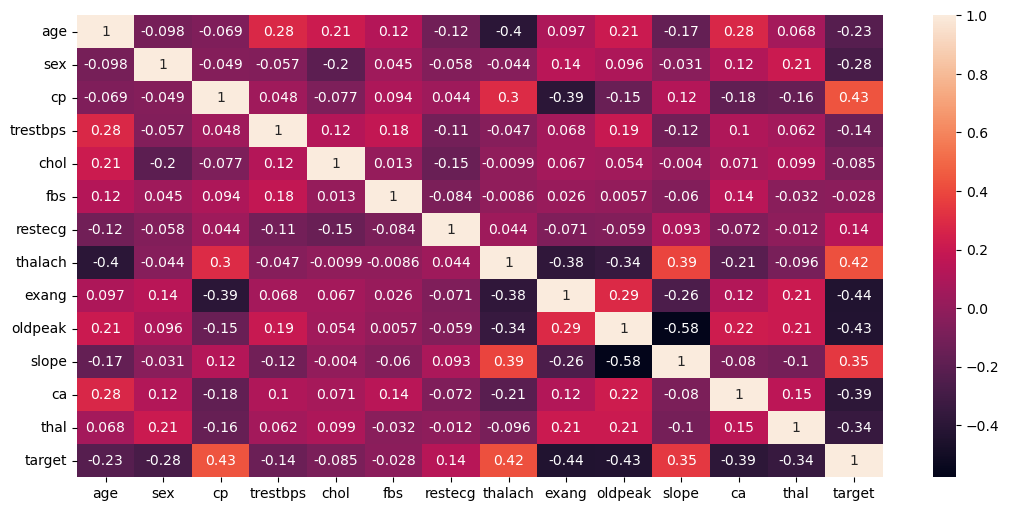

In [18]:
#Checking for feature correlation
plt.figure(figsize=(13, 6))
sns.heatmap(df.corr(),annot=True)
plt.show()

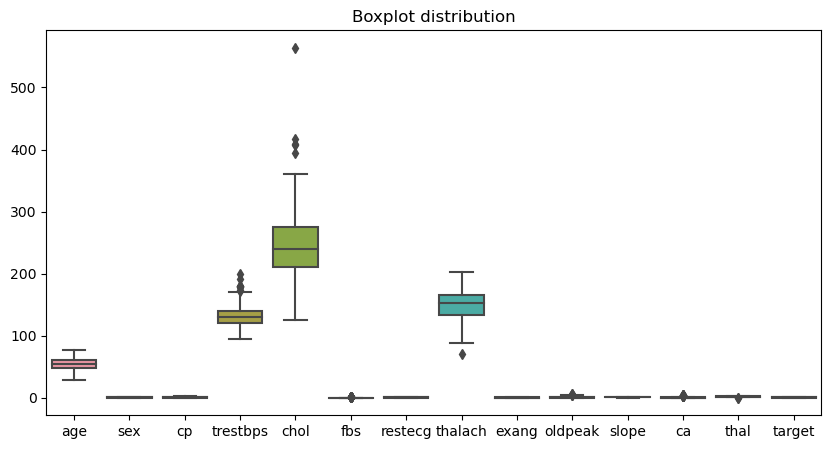

In [61]:
#Checking the distribution of the features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Boxplot distribution');

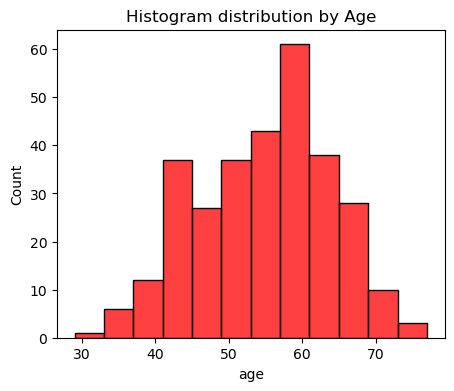

In [56]:
#plot showing feature distribution
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='age',color='red')
plt.title('Histogram distribution by Age');

The box plots and histograms reveal the distribution of features in the dataframe and highlight the importance of normalization to prevent bias. Normalization ensures that all features are on a similar scale, enabling fair comparisons and accurate analyses.

In [113]:
#Feature selection
X=df.drop('target',axis=1)
y=df['target']

#### Train-test Split

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)# using 20% of the data for testing

#### Normalising training dataset using Standardscaler

In [115]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

#### Support vector classification

In [116]:
svc=SVC()
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
svm_score=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[26  3]
 [ 5 27]]


#### Random Forest Classifier

In [117]:
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
y_pred=rfc.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[24  5]
 [ 4 28]]


#### KNeighbours Classifier

In [118]:
knc=KNeighborsClassifier()
knc.fit(X_train_scaled,y_train)
y_pred=knc.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

[[27  2]
 [ 4 28]]


#### Logistic Regression

In [119]:
logreg=LogisticRegression()
logreg.fit(X_train_scaled,y_train)
y_pred=logreg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[25  4]
 [ 5 27]]


### Hyper parameter tuning 

#### Random Forest 

In [120]:
#Random Forest classifier Hyper parameter tuning
grid_param = {"n_estimators": range(20,200,20),
         "max_depth": range(1,10),
         "min_samples_split" : [2,3,5,7,10],
         }
rfc_tuned = RandomForestClassifier()
gscv = GridSearchCV(rfc,grid_param, cv = 5, n_jobs = -1).fit(X_train_scaled,y_train)
print("Tuned Hyperparameters:",gscv.best_params_)
print("Accuracy:",gscv.best_score_)

Tuned Hyperparameters: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8388605442176871


In [135]:
rfc=RandomForestClassifier( n_estimators=100, max_depth=1,min_samples_split=2)
rfc.fit(X_train_scaled,y_train)
y_pred=rfc.predict(X_test_scaled)
rfc_score=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

[[24  5]
 [ 2 30]]


#### KNeighbours Classifier

In [136]:
#KNeighbours classifier Hyper parameter tuning
grid_param = {"n_neighbors": range(1,10)}
knc_tuned = KNeighborsClassifier()
gscv = GridSearchCV(knc_tuned,grid_param, cv = 5).fit(X_train_scaled,y_train)
print("Tuned Hyperparameters:",gscv.best_params_)
print("Accuracy:",gscv.best_score_)

Tuned Hyperparameters: {'n_neighbors': 5}
Accuracy: 0.8141156462585034


In [137]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train_scaled,y_train)
y_pred=knc.predict(X_test_scaled)
knc_score=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

[[27  2]
 [ 4 28]]


#### Logistic Regression

In [138]:
#Logistic regression Hyper parameter tuning
grid_param = {'penalty': ['l1', 'l2', 'elasticnet'], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
logreg_tuned = LogisticRegression()
gscv = GridSearchCV(logreg_tuned,grid_param, cv = 5).fit(X_train_scaled,y_train)
print("Tuned Hyperparameters:",gscv.best_params_)
print("Accuracy:",gscv.best_score_)

Tuned Hyperparameters: {'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8180272108843537


In [139]:
logreg=LogisticRegression(penalty='l1',solver='saga')
logreg.fit(X_train_scaled,y_train)
y_pred=logreg.predict(X_test_scaled)
logreg_score=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[25  4]
 [ 4 28]]


#### Results

In [140]:
Result_table = pd.DataFrame({'Model': ['Logistic Regression', 'KNeighbours', 'Support Vector Machine','Random Forest'], 
                        'Accuracy': [logreg_score*100, knc_score*100, svm_score*100, rfc_score*100]})

In [143]:
Result_table.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,KNeighbours,90.163934
3,Random Forest,88.524590
0,Logistic Regression,86.885246
2,Support Vector Machine,86.885246


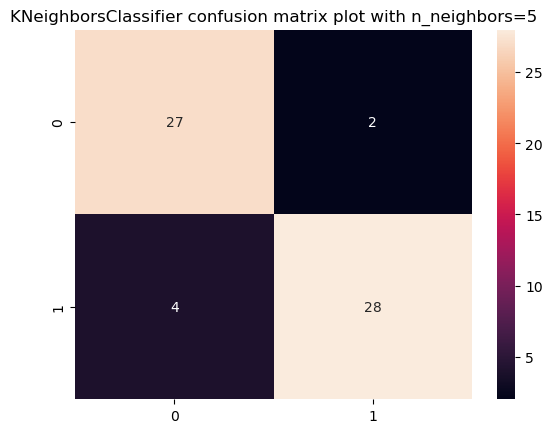

In [150]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train_scaled,y_train)
y_pred=knc.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True);
plt.title('KNeighborsClassifier confusion matrix plot with n_neighbors=5');